In [140]:
#import lib
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

In [141]:
#reading data 
df =pd.read_csv("C:\\Users\\Dell\\Downloads\\fish.csv")

In [142]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [143]:
df.info()
#number_columns = 7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [145]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [146]:
df.duplicated().sum()

0

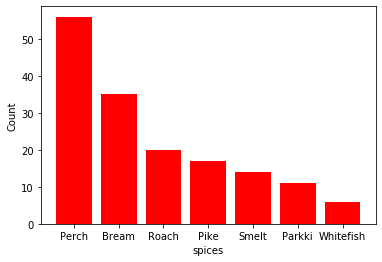

In [147]:
c=dict(df.Species.value_counts())
plt.bar(list(c.keys()),list(c.values()),color='red')
plt.xlabel("spices")
plt.ylabel("Count")
plt.show()

In [148]:
def p(x):
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    plt.hist(df[x])
    plt.show()
    plt.subplot(2,1,2)
    sns.boxplot(df[x])
    plt.show()

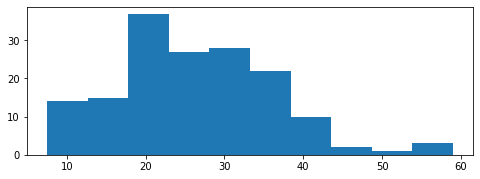

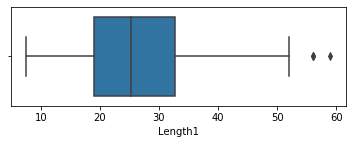

In [149]:
p("Length1")
#the boxplot shows there are two out layers the will be handeled later 

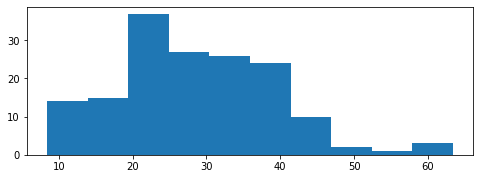

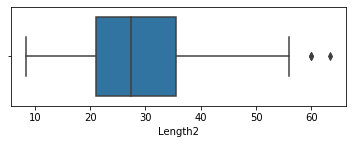

In [150]:
p("Length2")
#i will drop this as the histgram shows that lentgh1 and lentgh2 are almost the same 

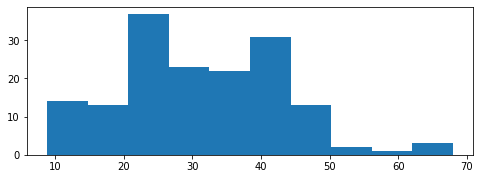

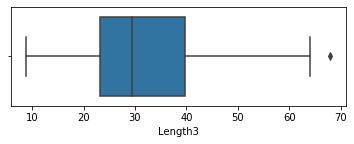

In [151]:
p("Length3")

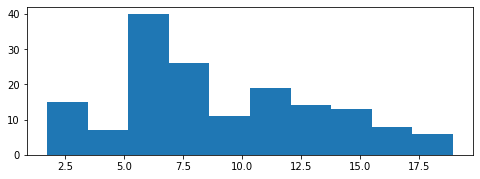

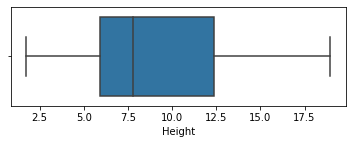

In [152]:
p("Height")

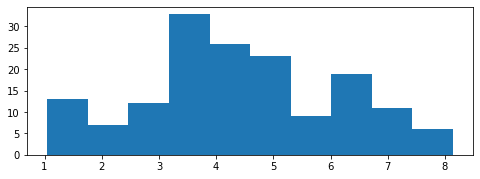

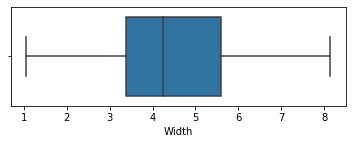

In [153]:
p("Width")

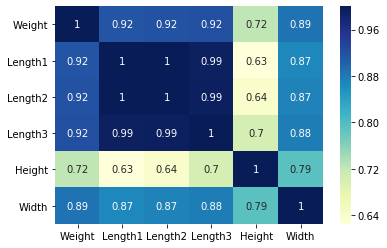

In [154]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

the heatmap shows tha lenght1,length2 and length3 are highlo collerated then i will try to build the model with and without(length2 and length3) to show the difference 

In [155]:
#handling out_layers 
#as i cosider height and length1 and width an the most important 3 features 
#hegith has no outlayers the i will handel the out_layer for lenght1 and widrh 


#weight_outlayers
df_weight = df['Weight']
df_weight_q1=df_weight.quantile(0.25)
df_weight_q3=df_weight.quantile(0.75)
df_weight_IQR= df_weight_q3-df_weight_q1
df_weight_lowerpound=df_weight_q1-1.5*df_weight_IQR
df_weight_higherpound=df_weight_q3+1.5*df_weight_IQR
dfw_outliers = df_weight[(df_weight < df_weight_lowerpound ) | (df_weight> df_weight_higherpound)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [156]:
#lenght1_outlayers
df_length = df['Length1']
df_length_q1=df_length1.quantile(0.25)
df_length_q3=df_length1.quantile(0.75)
df_length_IQR= df_length_q3-df_length_q1
df_length_lowerpound=df_length_q1-1.5*df_length_IQR
df_length_higherpound=df_length_q3+1.5*df_length_IQR
dfl_outliers = df_length[(df_length < df_length_lowerpound ) | (df_length> df_length_higherpound)]
dfl_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [157]:
df1=df.iloc[:,1:7]
df1.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [158]:

from sklearn import preprocessing
# Get column names first
names = df1.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [159]:
#without using standerscaler on df1 
x=df.iloc[:,2:7]
y=df['Weight']
print(x.shape)
print(y.shape)


(159, 5)
(159,)


In [160]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train1: ', np.shape(X_train1))
print('y_train1: ', np.shape(y_train1))
print('X_test1: ', np.shape(X_test1))
print('y_test1: ', np.shape(y_test1))

X_train1:  (127, 5)
y_train1:  (127,)
X_test1:  (32, 5)
y_test1:  (32,)


In [161]:
X_train1.head()

,Length1,Length2,Length3,Height,Width
111,32.5,35.0,37.3,11.4884,7.7957
131,34.8,37.3,39.8,6.2884,4.0198
58,28.5,31.0,34.0,10.7440,6.5620
102,25.2,27.3,28.7,8.3230,5.1373
47,21.1,22.5,25.0,6.4000,3.8000


In [162]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train1,y_train1)
reg.score(X_test1,y_test1)

0.8704220588719108

In [163]:
#dealing with scaled data frame 
x1=scaled_df.iloc[:,2:7]
y1=scaled_df['Weight']
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.2, random_state=1)
reg.fit(X_train2,y_train2)
reg.score(X_test2,y_test2)

0.8671655845053421

In [169]:
#use cross validation to get represtitive values
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
cv_results = cross_val_score(reg,X_train2, y_train2, cv=5)
cv_results 


array([0.81765216, 0.91436595, 0.89627558, 0.88435975, 0.80323317])

In [170]:
#get he mean value cv_results
print(np.mean(cv_results))

0.8631773210475366


In [ ]:
#remove oultyers and dealing with model again 
df2 = df.drop([142,143,144])
df2.describe().T

In [173]:
x_no_out=df2.iloc[:,2:7]
y_no_out=df2['Weight']
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_no_out, y_no_out, test_size=0.2, random_state=1)
reg=LinearRegression()
cv_results2 = cross_val_score(reg, X_train3, y_train3,cv= 5)
print(np.mean(cv_results2))
#note that the accuracy of he model in higher now 

0.8952132388952407


In [191]:
#it is the to remove highlt colleated features and check if there is a differnce or not 
#i will use the data without "outlayers"
df_no_corr=df2.drop(['Length2','Length3'],axis=1)
df_no_corr.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [192]:
x_no_corr=df_no_corr.iloc[:,2:5]
y_no_corr=df_no_corr['Weight']
print(x_no_corr.head())
print(y_no_corr.head())

   Length1   Height   Width
0     23.2  11.5200  4.0200
1     24.0  12.4800  4.3056
2     23.9  12.3778  4.6961
3     26.3  12.7300  4.4555
4     26.5  12.4440  5.1340
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


In [195]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x_no_corr, y_no_corr, test_size=0.2, random_state=1)
reg=LinearRegression()
reg.fit(X_train4,y_train4)
cv_results3= cross_val_score(reg,X_train4 , y_train4,cv= 5)
print(np.mean(cv_results3))

0.8874769257973524


In [196]:
y_pred=reg.predict(X_test4)

In [197]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_test1 = pd.DataFrame(y_test4)
y_test1 = y_test1.reset_index(drop=True)
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,686.548274
1,51.5,22.326816
2,180.0,279.949017
3,955.0,780.125975
4,40.0,-43.094101
5,0.0,162.476573
6,600.0,567.729677
7,514.0,594.086035
8,272.0,393.388830
9,9.8,-185.356326
